In [4]:
import pandas as pd
import matplotlib as plt
import numpy as np


In [1]:
!wget https://raw.githubusercontent.com/Abdullahfoysal/pp11-Project-AnalyzeAndVisualize/refs/heads/main/student_data.csv

--2024-12-21 04:24:35--  https://raw.githubusercontent.com/Abdullahfoysal/pp11-Project-AnalyzeAndVisualize/refs/heads/main/student_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133023 (130K) [text/plain]
Saving to: ‘student_data.csv’

student_data.csv    100%[===================>] 129.91K  --.-KB/s    in 0.004s  

2024-12-21 04:24:35 (32.7 MB/s) - ‘student_data.csv’ saved [133023/133023]



# **1. Count how many students have attended abroad and those who have not.**

In [ ]:
#Students who have studied abroad

#Read the csv file
df = pd.read_csv("student_data.csv")

#print study abroad column
#print(df["abroad_study"])

#Replace True as 1, False as 0, in a new abroad_study_numeric column, to count 1s

#create new column named "abroad_study_numeric" where 'True' and 'False' are replaced with 1 and 0, respectively
df["abroad_study_numeric"] = df["abroad_study"].replace({True : 1, False : 0})
print(df[['first_name', 'last_name', 'abroad_study', 'abroad_study_numeric', 'study_abroad_country']])

true_count = np.count_nonzero(df['abroad_study_numeric'])  #count 1s
zero_count = len(df["abroad_study_numeric"]) - true_count  #count 0s by subtracting 1s from whole column

print(f"\nNumber of students abroad: {true_count} ")
print(f"\nNumber of students not abroad: {zero_count} ")

#true_count = (df["abroad_study_numeric"] == "1").sum()
#print(f"Number of students attended abroad: {true_count}")

    first_name   last_name  abroad_study  abroad_study_numeric  \
0       Fraser   Petschelt         False                     0   
1           Si     Skottle          True                     1   
2        Barbi   Seedhouse         False                     0   
3       Shadow      Scarff          True                     1   
4        Karim  Domenicone         False                     0   
..         ...         ...           ...                   ...   
995  Catharina     Bradtke         False                     0   
996  Anastasia       Lowde          True                     1   
997      Tandi    Whitlock         False                     0   
998    Malvina        Tuhy          True                     1   
999     Kissee    Okeshott         False                     0   

      study_abroad_country  
0                   France  
1                    China  
2                    China  
3                   Brazil  
4                   Sweden  
..                     ...  
995 

<ipython-input-37-85bedec0328f>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["abroad_study_numeric"] = df["abroad_study"].replace({True : 1, False : 0})


# **2. Filter students who belong to the "Medical" department.**

In [ ]:
#df = pd.read_csv("student_data.csv")
filtered = df[(df["department"] == "Medicine")]
print(f"Students who belong to medical department\n: {filtered[['first_name','last_name', 'department']]}")

student_count = filtered["department"].count() #filtered is a new DataFrame
print(f"Number of students who belong to medical department: {student_count}")

Students who belong to medical department
:     first_name  last_name department
7         Lori  McQuarrie   Medicine
12        Nita     Cloutt   Medicine
14        Wade       Stag   Medicine
17    Jaquelin    Hoffman   Medicine
19     Nichole     Stoney   Medicine
..         ...        ...        ...
977      Ramon     Darley   Medicine
986     Shelba    Barthod   Medicine
995  Catharina    Bradtke   Medicine
997      Tandi   Whitlock   Medicine
998    Malvina       Tuhy   Medicine

[211 rows x 3 columns]
Number of students who belong to medical department: 211


# **3. Calculate the highest HSC GPA in the dataset.**

In [ ]:
#finding the maximum hsc gpa
highest_gpa = df["hsc_gpa"].max()   #it will give the highest gpa value, not a dataFrame. So cant use it as DataFrame.
print(f"Highest HSC GPA: {highest_gpa}")

#creating new dataFrame with those who got highest gpa and print them
who_got_highest_gpa = df[df["hsc_gpa"] == highest_gpa]
print(f"\nWho got highest CGPA:\n {who_got_highest_gpa[['first_name','last_name', 'hsc_gpa']]}")

#calculating the number of students who got highest gpa
filtered = df[(df["hsc_gpa"] == highest_gpa)]  #filter out data with highest_gpa
count_gpa = filtered["hsc_gpa"].count()         #count highest gpa in 'hsc_gpa' column
print(f"\nNumber of students who got highest HSC gpa: {count_gpa}")

Highest HSC GPA: 5

Who got highest CGPA:
     first_name    last_name  hsc_gpa
0       Fraser    Petschelt        5
3       Shadow       Scarff        5
4        Karim   Domenicone        5
9        Cordi      Wegener        5
11         Sal    MacMurray        5
..         ...          ...      ...
952      Kacey       Grinov        5
957      Katee  Lightollers        5
979     Lianne        Perks        5
981     Muffin         Pont        5
995  Catharina      Bradtke        5

[185 rows x 3 columns]

Number of students who got highest HSC gpa: 185


# **4. Replace missing values in the "gender" column with "Unknown".**

In [ ]:
#No missing values were observed in the "gender" column
missing_gender = df[df["gender"].isnull()]
print(f"Missing gender: {missing_gender}")

df_filled =df.fillna({"gender": "Unknown"}) #{column name: replacing word}
#print("\nAfter Filling Missing Dta:\n",df_filled)
filtered = df_filled[df_filled["gender"] == "Unknown"]
print("\nFiltered Rows with Unknown gender:\n", filtered)

Missing gender: Empty DataFrame
Columns: [id, first_name, last_name, email, gender, ip_address, cgpa, passing_year, department, attendance, home_district, abroad_study, student_id, graduation_date, study_abroad_country, study_abroad_city, hsc_gpa, ssc_gpa]
Index: []

Filtered Rows with Unknown gender:
 Empty DataFrame
Columns: [id, first_name, last_name, email, gender, ip_address, cgpa, passing_year, department, attendance, home_district, abroad_study, student_id, graduation_date, study_abroad_country, study_abroad_city, hsc_gpa, ssc_gpa]
Index: []


# **4.1. Replacing upper case "M" and "F" in Male and Female keywords with lower case letters "m" and "f", respectively, in "gender" column**

In [5]:
df = pd.read_csv("student_data.csv")
df["gender"] = df["gender"].str.lower()
print(df[['first_name', 'last_name', 'gender']])

    first_name   last_name      gender
0       Fraser   Petschelt        male
1           Si     Skottle        male
2        Barbi   Seedhouse      female
3       Shadow      Scarff        male
4        Karim  Domenicone        male
..         ...         ...         ...
995  Catharina     Bradtke      female
996  Anastasia       Lowde      female
997      Tandi    Whitlock      female
998    Malvina        Tuhy  non-binary
999     Kissee    Okeshott      female

[1000 rows x 3 columns]


# 5. Plot a pie chart showing the distribution of students based on their "study_abroad_country".

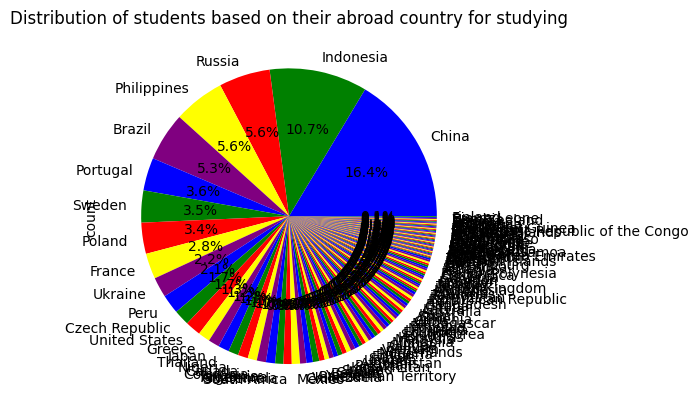

In [ ]:
import matplotlib.pyplot as plt

country_counts = df["study_abroad_country"].value_counts()
country_counts.plot(kind = 'pie', autopct='%1.1f%%', colors=['blue', 'green', 'red', 'yellow', 'purple'])
plt.title('Distribution of students based on their abroad country for studying')
plt.show()